In [1]:
%matplotlib inline

In [2]:
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import optuna

pd.options.display.max_columns = 100

best val: 0.719


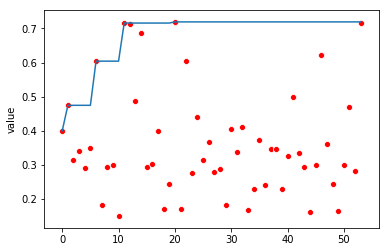

In [3]:
data = joblib.load('study.pkl')

df = data.trials_dataframe()
df.dropna(inplace=True)
df.reset_index(inplace=True)

df['time'] = df.datetime_complete - df.datetime_start
df['time'] = df.time.astype('int') / (1_000_000_000)
df = df[df.time>0]

names = []

for col in df.columns.values:
    if col[1] == '':
        names.append(col[0])
    else:
        names.append(col[1])

df.columns = names

print('best val:', - round(df.value.min(),4))
sns.lineplot(x=df.index, y=-df.value.cummin())
sns.scatterplot(x=df.index, y=-df.value, color='red');

In [4]:
df

,index,trial_id,state,value,datetime_start,datetime_complete,lgbc__colsample_bytree,lgbc__learning_rate,lgbc__max_depth,lgbc__min_child_samples,lgbc__n_estimators,lgbc__num_leaves,lgbc__reg_alpha,lgbc__subsample_for_bin,tfidf__analyzer,tfidf__lowercase,tfidf__max_features,time
0,0,0,TrialState.COMPLETE,-0.400091,2019-02-25 20:59:32.146270,2019-02-25 21:01:12.960020,0.710570,0.059966,57.0,336.0,188.0,136.0,0.060675,113091.0,char_wb,False,8674.0,100.813750
1,1,1,TrialState.COMPLETE,-0.474644,2019-02-25 21:01:12.964049,2019-02-25 21:02:41.765900,0.672198,0.094305,48.0,199.0,144.0,125.0,0.449014,140009.0,word,True,8671.0,88.801851
2,2,2,TrialState.COMPLETE,-0.315401,2019-02-25 21:02:41.771155,2019-02-25 21:03:52.063515,0.918274,0.017374,58.0,195.0,101.0,8.0,0.134891,64763.0,char_wb,False,6119.0,70.292360
3,3,3,TrialState.COMPLETE,-0.342112,2019-02-25 21:03:52.067355,2019-02-25 21:07:23.717368,0.906122,0.007368,94.0,70.0,177.0,24.0,0.029314,104573.0,char,False,7129.0,211.650013
4,4,4,TrialState.COMPLETE,-0.292311,2019-02-25 21:07:23.721233,2019-02-25 21:08:15.866035,0.659433,0.015994,44.0,321.0,186.0,20.0,0.239385,170501.0,char,True,6697.0,52.144802
5,5,5,TrialState.COMPLETE,-0.349814,2019-02-25 21:08:15.872117,2019-02-25 21:10:30.483515,0.664731,0.006943,43.0,76.0,129.0,35.0,0.277649,102470.0,char_wb,False,1162.0,134.611398
6,6,6,TrialState.COMPLETE,-0.604032,2019-02-25 21:10:30.488356,2019-02-25 21:14:22.584366,0.808230,0.037193,61.0,118.0,180.0,26.0,0.251131,89910.0,word,True,8417.0,232.096010
7,7,7,TrialState.COMPLETE,-0.181194,2019-02-25 21:14:22.591903,2019-02-25 21:14:39.407253,0.685757,0.003107,79.0,330.0,40.0,50.0,0.215447,294366.0,word,False,8611.0,16.815350
8,8,8,TrialState.COMPLETE,-0.293188,2019-02-25 21:14:39.413070,2019-02-25 21:15:33.102528,0.875682,0.015824,53.0,409.0,138.0,9.0,0.498929,49648.0,char,False,2333.0,53.689458
9,9,9,TrialState.COMPLETE,-0.299368,2019-02-25 21:15:33.109599,2019-02-25 21:16:40.683702,0.939009,0.060967,83.0,304.0,159.0,103.0,0.776622,111557.0,word,False,1343.0,67.574103
